In [22]:
import numpy as np
import pandas as pd
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
plt.style.use('bmh')

In [23]:
from google.colab import files
uploaded = files.upload()

Saving Tesla.csv - Tesla.csv.csv to Tesla.csv - Tesla.csv.csv


In [24]:
df = pd.read_csv('Tesla.csv - Tesla.csv.csv')
df.head(6)

,Date,Open,High,Low,Close,Volume,Adj Close
0,6/29/2010,19.000000,25.000000,17.540001,23.889999,18766300,23.889999
1,6/30/2010,25.790001,30.420000,23.299999,23.830000,17187100,23.830000
2,7/1/2010,25.000000,25.920000,20.270000,21.959999,8218800,21.959999
3,7/2/2010,23.000000,23.100000,18.709999,19.200001,5139800,19.200001
4,7/6/2010,20.000000,20.000000,15.830000,16.110001,6866900,16.110001
5,7/7/2010,16.400000,16.629999,14.980000,15.800000,6921700,15.800000


In [25]:
df.shape

(1692, 7)

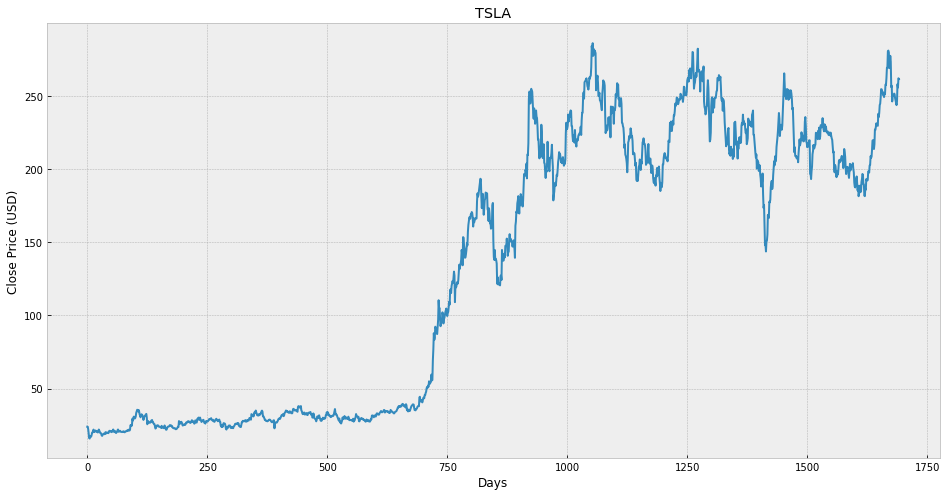

In [27]:
plt.figure(figsize = (16,8))
plt.title('TSLA')
plt.xlabel('Days')
plt.ylabel('Close Price (USD)')
plt.plot(df['Close'])
plt.show()

In [28]:
df = df[['Close']]
df.head(4)

,Close
0,23.889999
1,23.830000
2,21.959999
3,19.200001


In [29]:
future_days = 25
df['Prediction'] = df[['Close']].shift(-future_days)
df.tail(4)

,Close,Prediction
1688,258.000000,NaN
1689,255.729996,NaN
1690,262.049988,NaN
1691,261.500000,NaN


In [30]:
X = np.array(df.drop(['Prediction'], 1))[:-future_days]
print(X)

[[ 23.889999]
 [ 23.83    ]
 [ 21.959999]
 ...
 [257.480011]
 [262.079987]
 [269.200012]]


In [31]:
y = np.array(df['Prediction'])[:-future_days]
print(y)

[ 21.26      20.450001  19.59     ... 255.729996 262.049988 261.5     ]


In [32]:
x_train,  x_test, y_train, y_test = train_test_split(X, y, train_size = 0.25)

In [33]:
lr = LinearRegression().fit(x_train, y_train)

In [35]:
x_future = df.drop(['Prediction'], 1)[:-future_days]
x_future = x_future.tail(future_days)
x_future = np.array(x_future)
x_future

array([[226.75    ],
       [229.009995],
       [231.279999],
       [229.869995],
       [229.729996],
       [229.589996],
       [237.75    ],
       [235.580002],
       [238.360001],
       [243.759995],
       [244.729996],
       [248.919998],
       [254.610001],
       [254.470001],
       [252.509995],
       [252.949997],
       [250.630005],
       [251.929993],
       [249.240005],
       [251.550003],
       [251.330002],
       [257.769989],
       [257.480011],
       [262.079987],
       [269.200012]])

In [36]:
lr_prediction = lr.predict(x_future)
print(lr_prediction)

[229.14848989 231.36449417 233.59031264 232.20775431 232.07048038
 231.93320548 239.93437533 237.80661625 240.53250268 245.82738602
 246.77850599 250.88694977 256.46619709 256.32892218 254.40706762
 254.838505   252.56367155 253.83835534 251.20072784 253.46576183
 253.25004314 259.56467605 259.28034246 263.79078011 270.77221411]


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


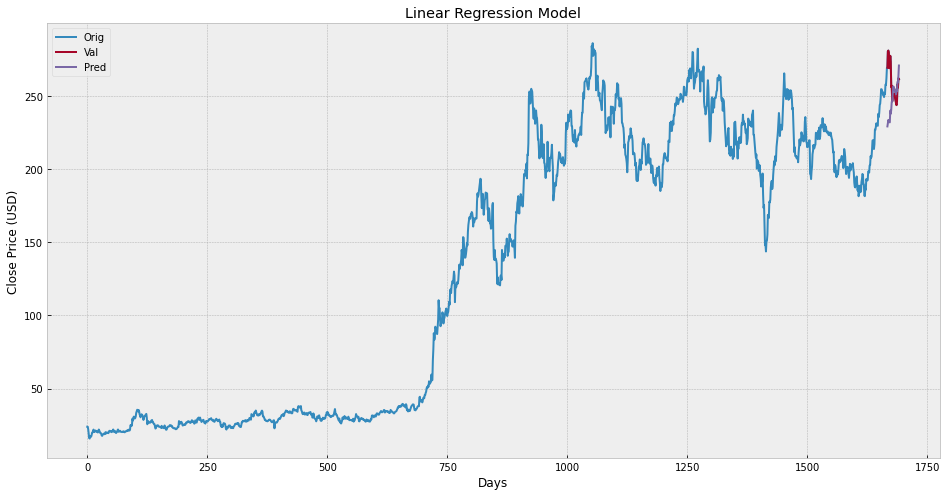

In [42]:
predictions = lr_prediction
valid = df[X.shape[0]:]
valid['Predictions'] = predictions
plt.figure(figsize = (16, 8))
plt.title('Linear Regression Model')
plt.xlabel('Days')
plt.ylabel('Close Price (USD)')
plt.plot(df['Close'])
plt.plot(valid[['Close', 'Predictions']])
plt.legend(['Orig', 'Val', 'Pred'])
plt.show()